In [2]:

import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('BlackFriday.csv')

WALKTHROUGH INTO DATASET

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

we will not analyze the columns Product_Category_2 and Product_category_3 as it holds nearly one fourth of the DataSet as NULL.
Thatswhy we will remove it from the dataset.

In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


Analyzing Columns

No. of unique users

In [9]:
df['User_ID'].nunique()

5891

No. of unique products sold

In [10]:
df['Product_ID'].nunique()


3623

Age slabs

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

City category

In [12]:
df['City_Category'].unique()


array(['A', 'C', 'B'], dtype=object)

No of years staying in that city

In [13]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

Product categories

In [14]:
df['Product_Category_1'].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

Total Sales

In [15]:
df['Purchase'].sum()


5017668378

Analysing Gender

In [16]:
len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])

(405380, 132197)

drawing pie chart on gender

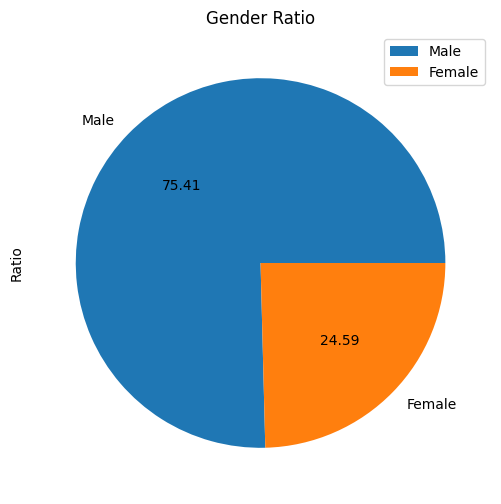

In [17]:
data=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data.plot.pie(y='Ratio',figsize=(6,6),autopct="%.2f",title='Gender Ratio')
plt.show()

Plotting Bar Graph using GroupBy function 

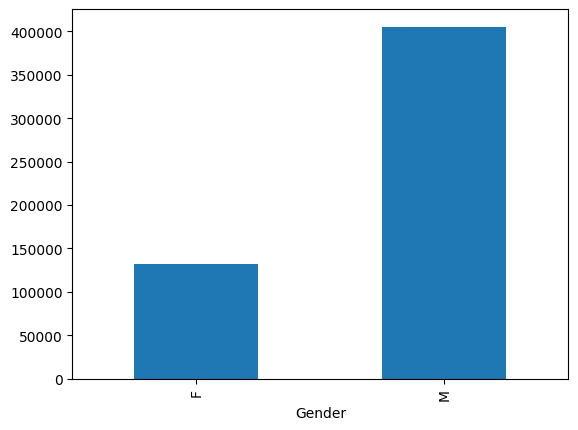

In [18]:
df.groupby('Gender').size().plot(kind='bar')
plt.show()

Total Sales Gender-Wise

<Axes: ylabel='Purchase'>

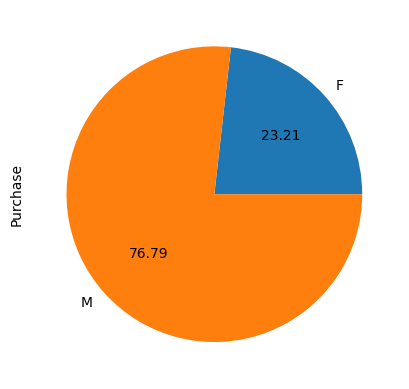

In [19]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',autopct="%.2f")

Average spent by males and females

<function matplotlib.pyplot.show(close=None, block=None)>

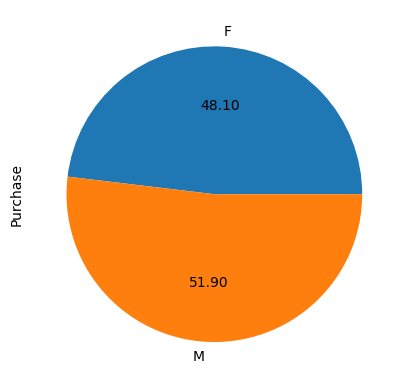

In [20]:
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct="%.2f")
plt.show

Analyzing age and Marital status

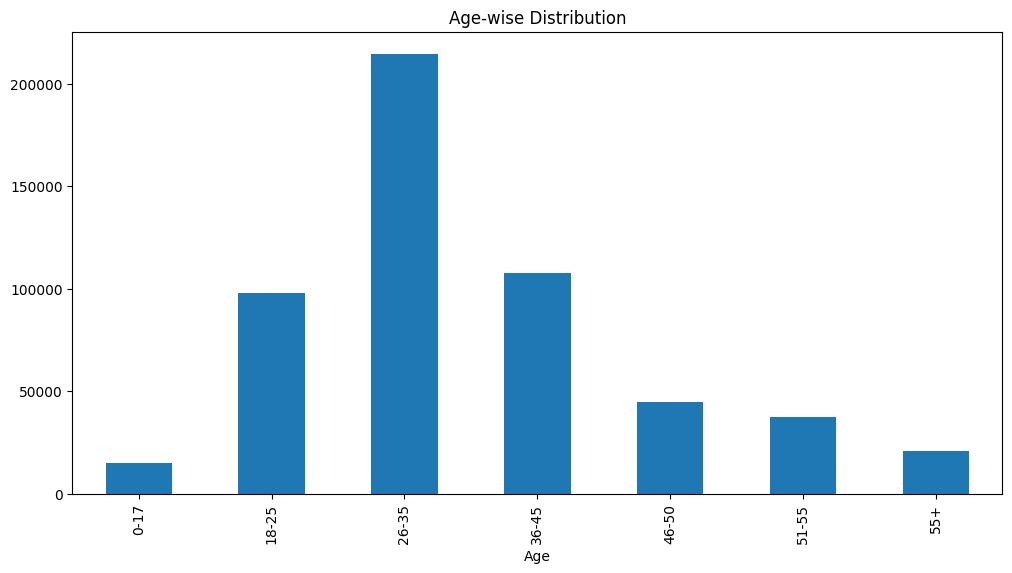

In [21]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title='Age-wise Distribution') 
plt.show()

In [22]:
for i in df['Age'].unique():
    print(i,':',len(df['Age']==i))

0-17 : 537577
55+ : 537577
26-35 : 537577
46-50 : 537577
51-55 : 537577
36-45 : 537577
18-25 : 537577


No. of unique products bought by a particular age group

In [23]:
df[df['Age']==i]['Product_ID'].nunique()

3213

Creating a Dataframe of age slabs with respect to unique products sold to that slab

<Axes: xlabel='Age'>

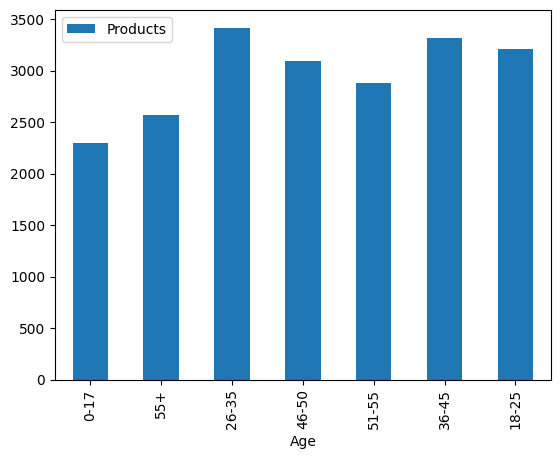

In [24]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
    data1=pd.DataFrame(lst,columns=['Age','Products'])
data1.plot.bar(x='Age')

<Axes: title={'center': 'Amount-wise Distribution'}, xlabel='Age'>

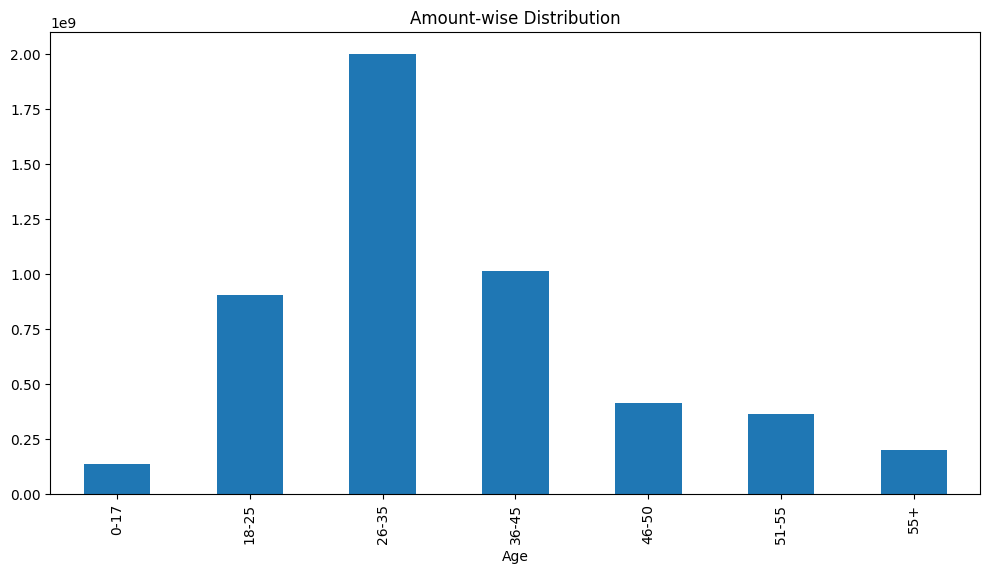

In [25]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,6),title='Amount-wise Distribution')

<Axes: title={'center': 'Amount-wise Distribution'}, xlabel='Age'>

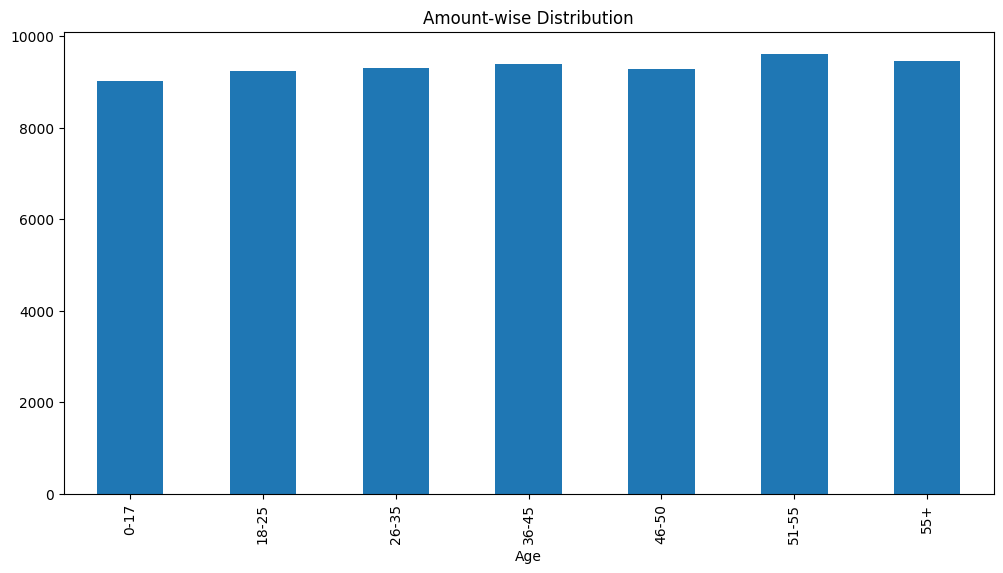

In [26]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar',figsize=(12,6),title='Amount-wise Distribution')

<Axes: title={'center': 'Amount-wise Distribution'}, ylabel='Purchase'>

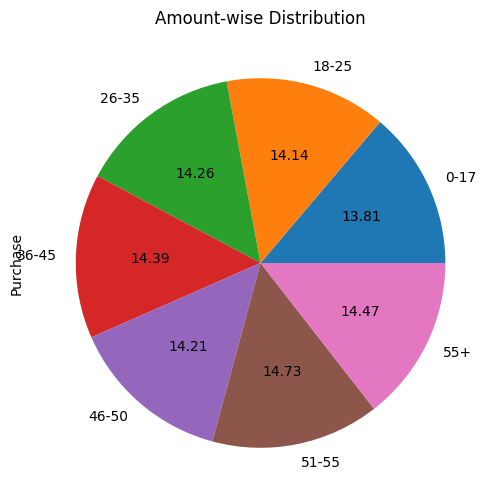

In [27]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie',figsize=(12,6),title='Amount-wise Distribution',autopct="%.2f")

<Axes: >

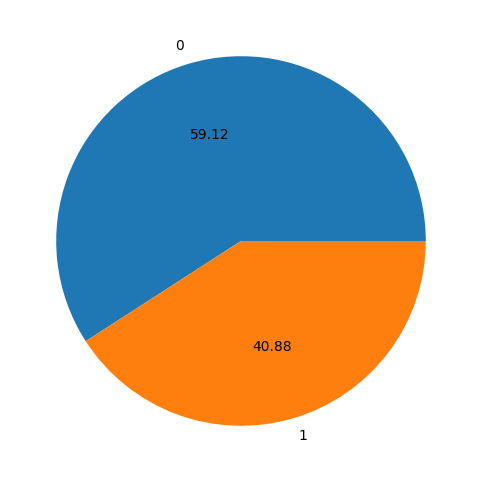

In [28]:
df.groupby('Marital_Status').size().plot(kind='pie',figsize=(12,6),autopct="%.2f")

<Axes: >

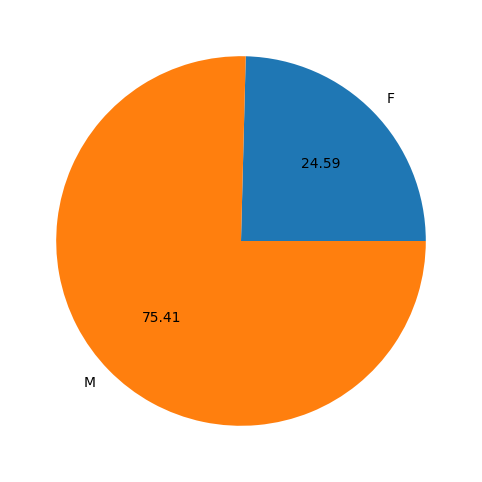

In [29]:
df.groupby('Gender').size().plot(kind='pie',figsize=(12,6),autopct="%.2f")

Multiple column Analysis

<Axes: xlabel='Age', ylabel='count'>

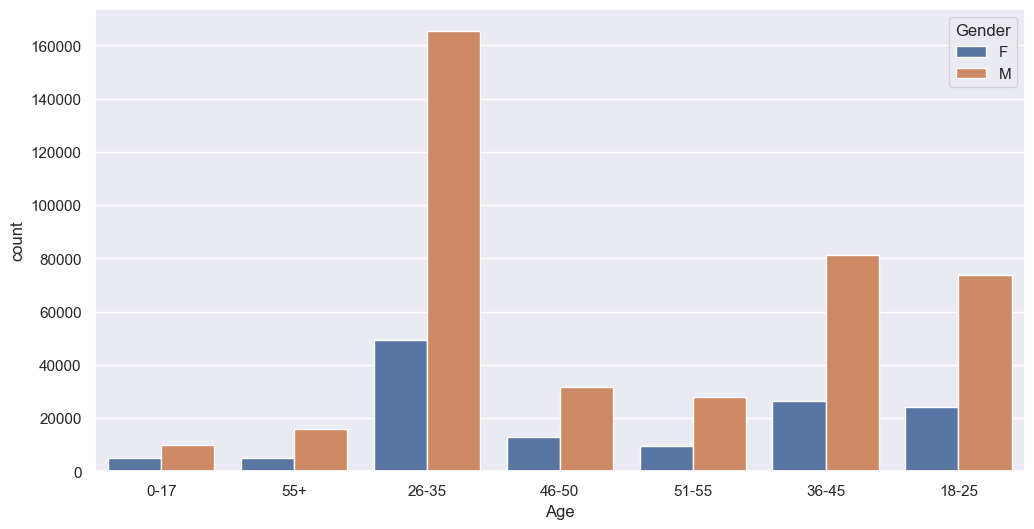

In [30]:
sns.set(rc={'figure.figsize' : (12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

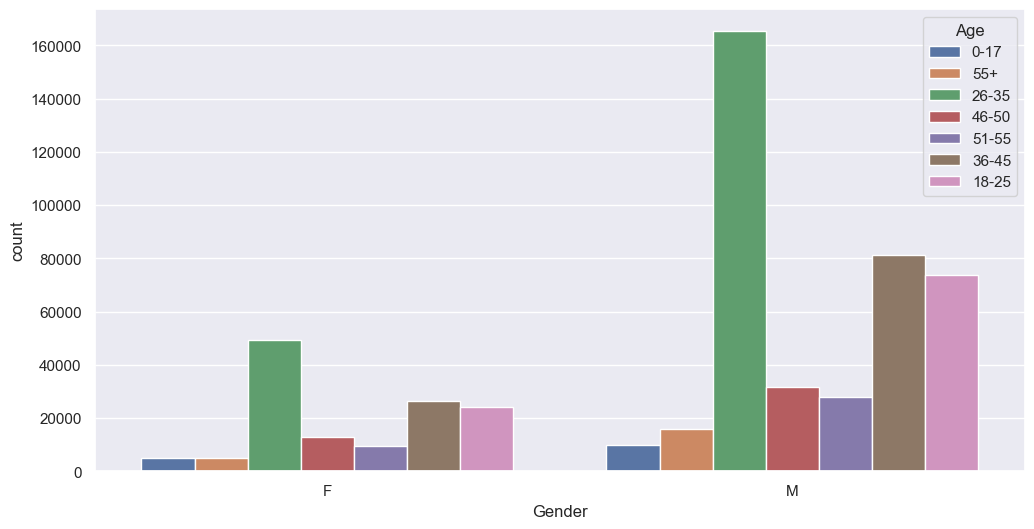

In [31]:
sns.set(rc={'figure.figsize' : (12,6)})
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

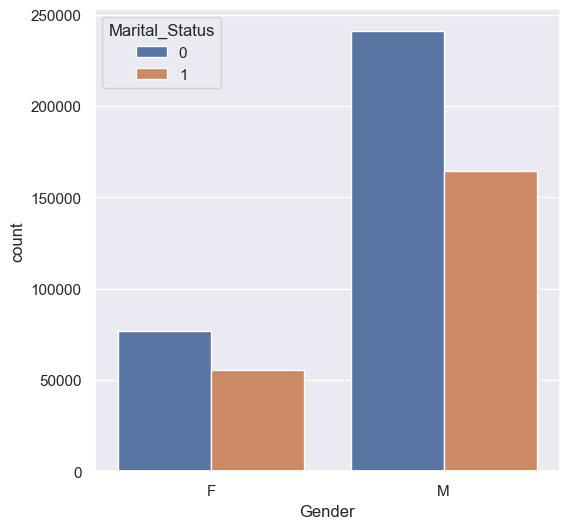

In [32]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

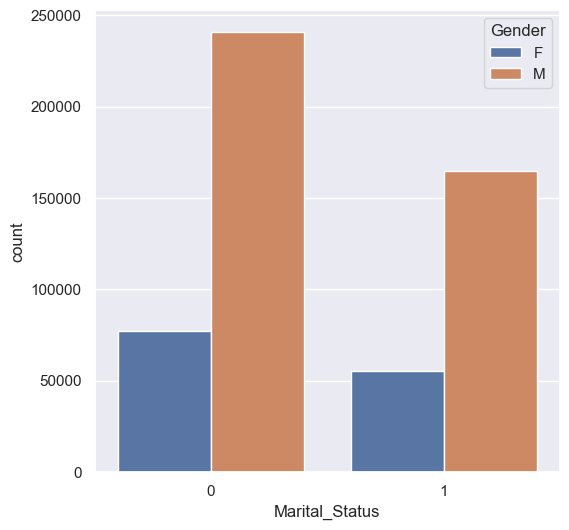

In [33]:
sns.set(rc={'figure.figsize' : (6,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

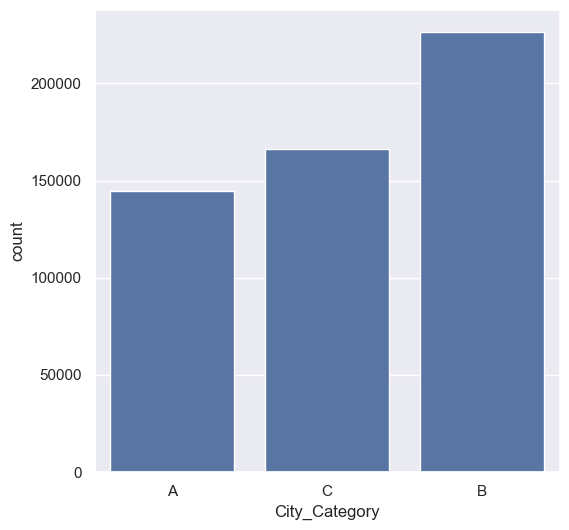

In [34]:
sns.countplot(x=df['City_Category'])


<Axes: xlabel='City_Category', ylabel='count'>

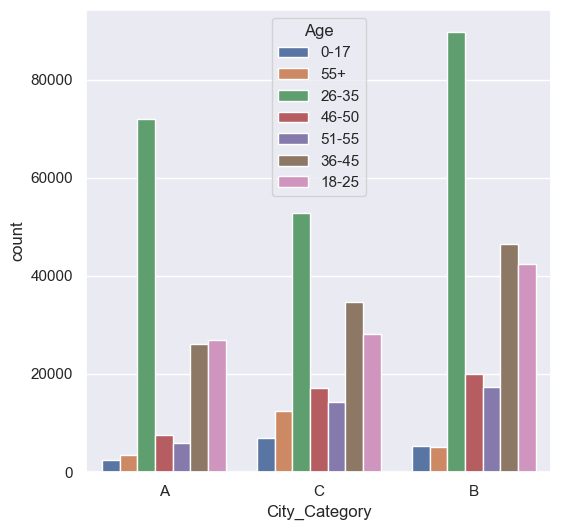

In [35]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

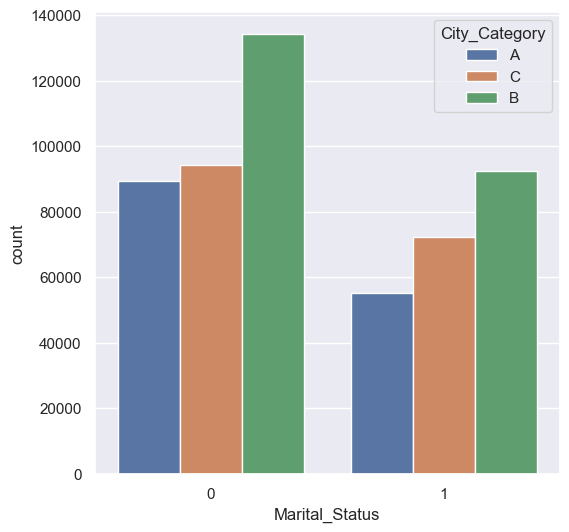

In [36]:
sns.countplot(x='Marital_Status',hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

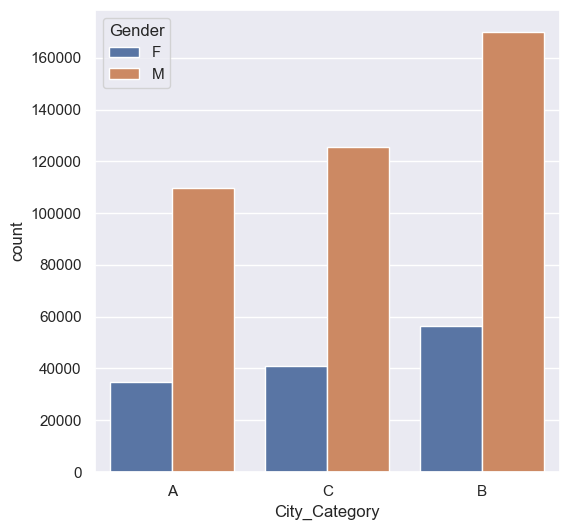

In [37]:
sns.countplot(x='City_Category',hue='Gender',data=df)

<Axes: ylabel='Purchase'>

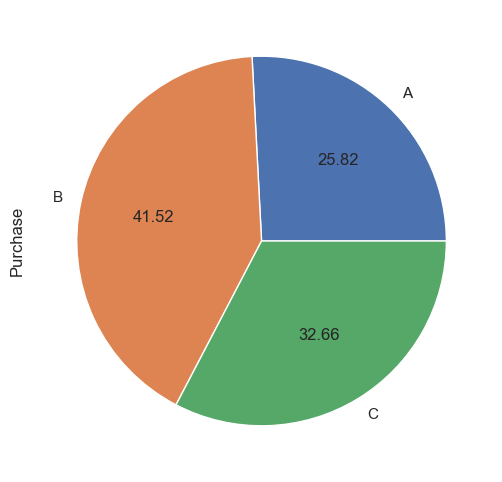

In [38]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct="%.2f")

<Axes: ylabel='Purchase'>

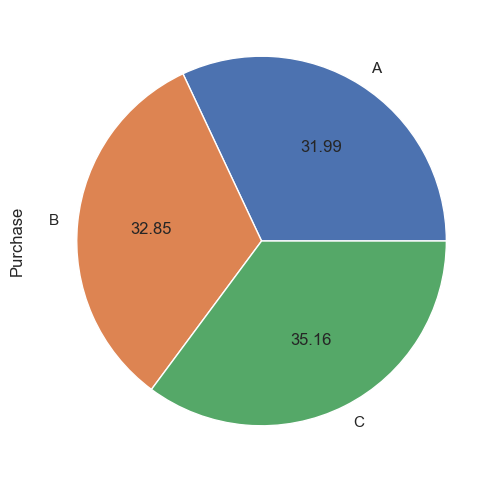

In [39]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct="%.2f")

Staying years column comparison

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

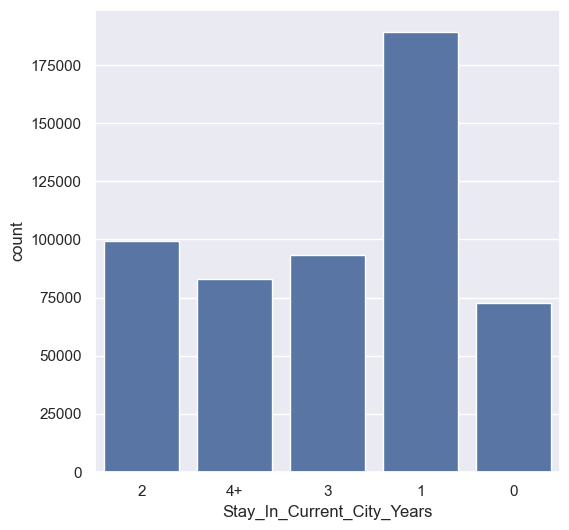

In [40]:
sns.countplot(x=df['Stay_In_Current_City_Years'])



<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

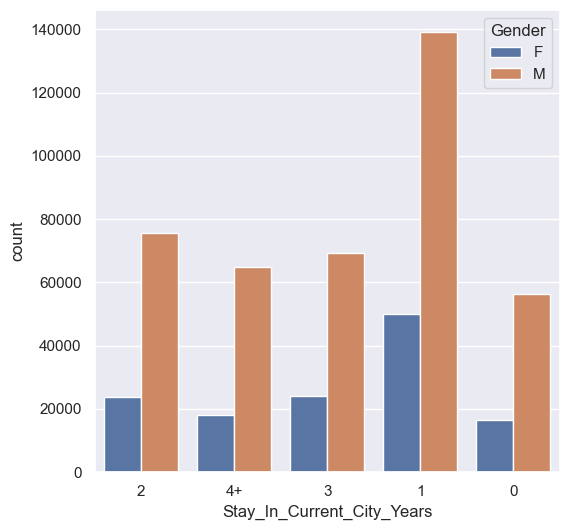

In [41]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

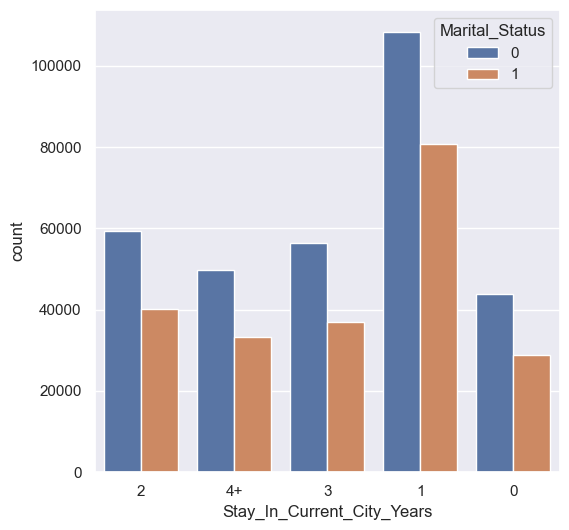

In [42]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

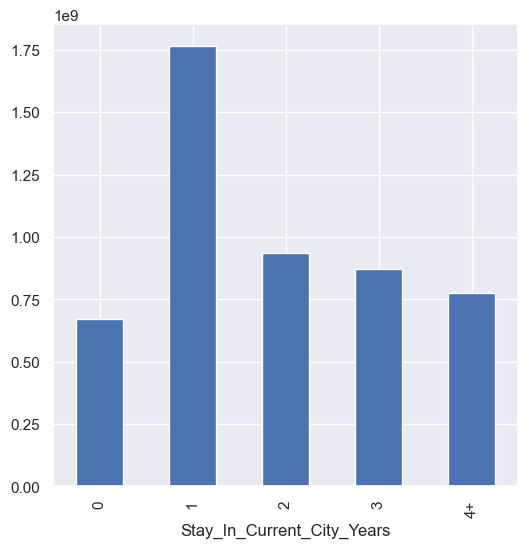

In [43]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

Occupation Column Analysis

<Axes: xlabel='Occupation', ylabel='count'>

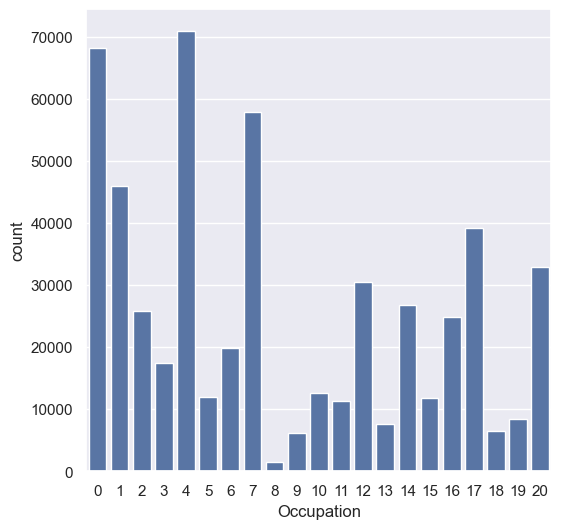

In [44]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

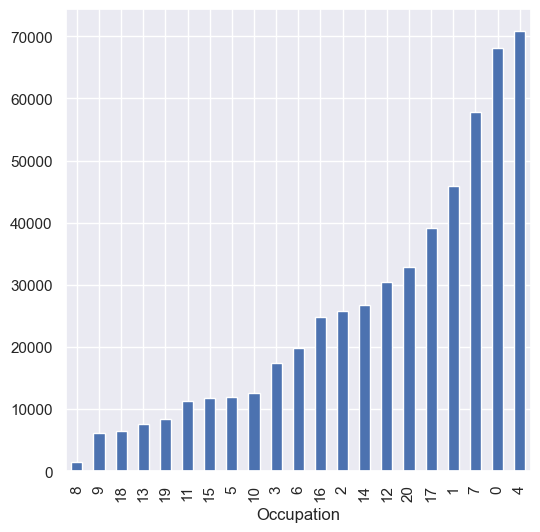

In [45]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

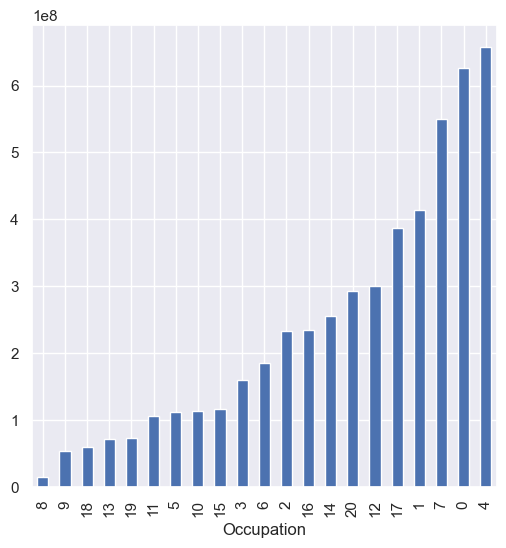

In [46]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

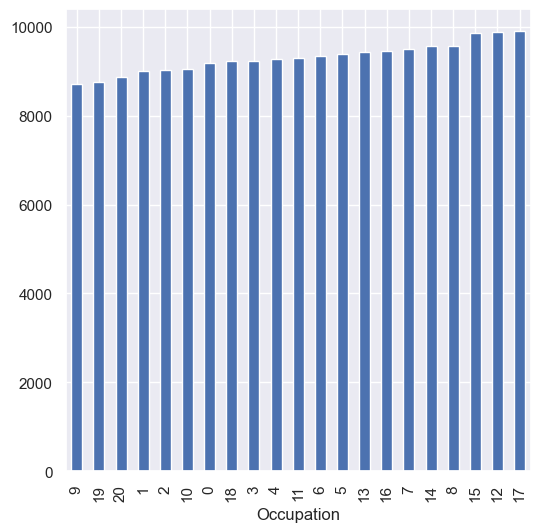

In [47]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

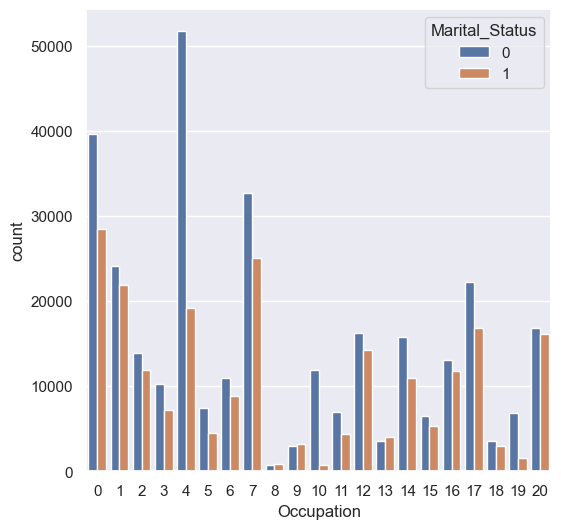

In [48]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

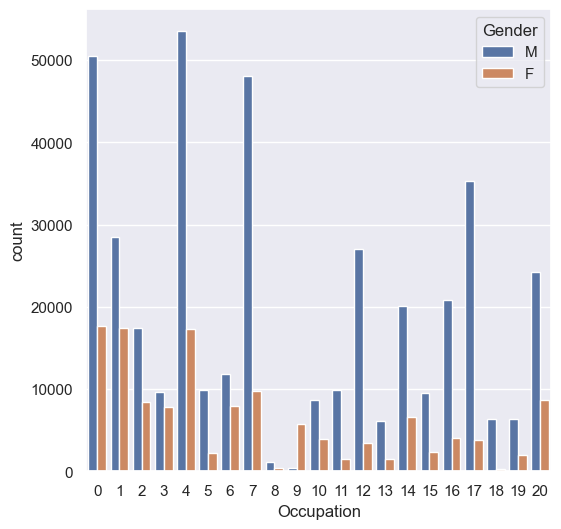

In [49]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation'>

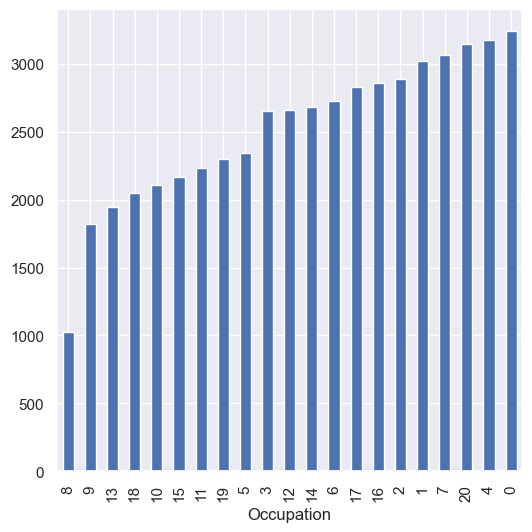

In [50]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

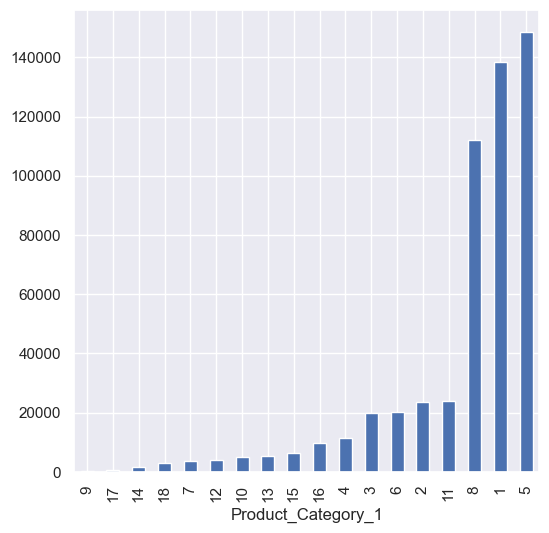

In [51]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

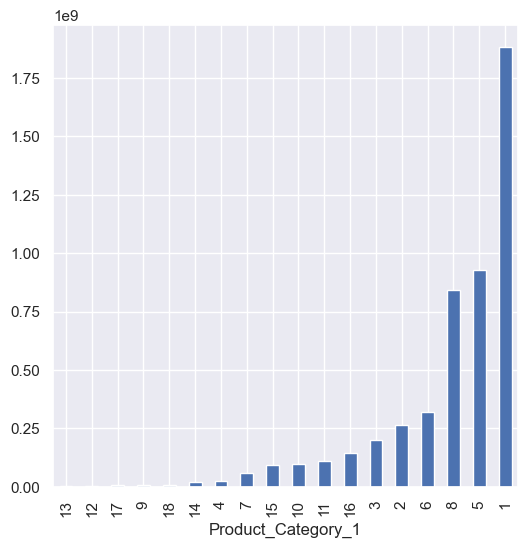

In [52]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

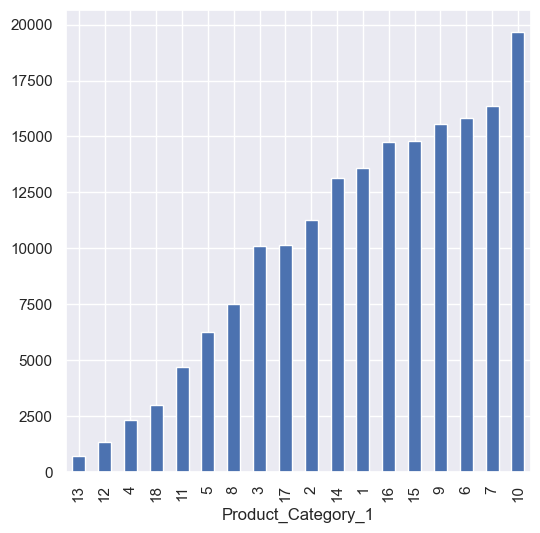

In [53]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

most revenue generating Product

<Axes: xlabel='Product_ID'>

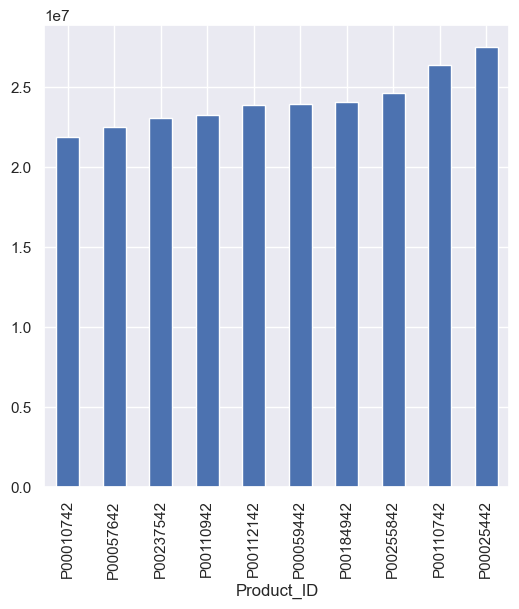

In [54]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')

Most expensive product

<Axes: xlabel='Product_ID'>

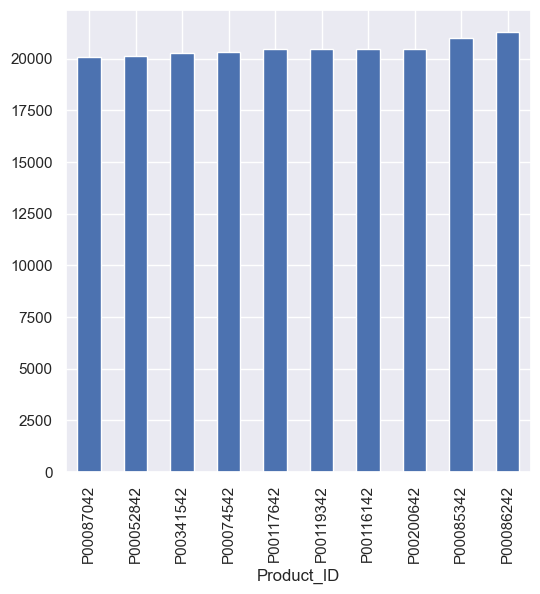

In [55]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')

Most selling product

<Axes: xlabel='Product_ID'>

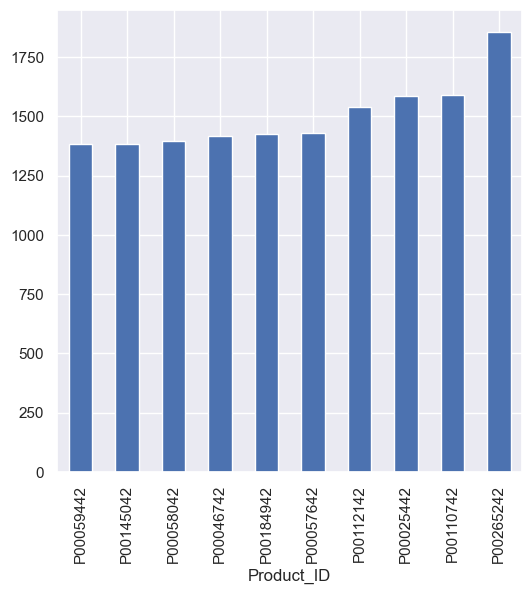

In [56]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

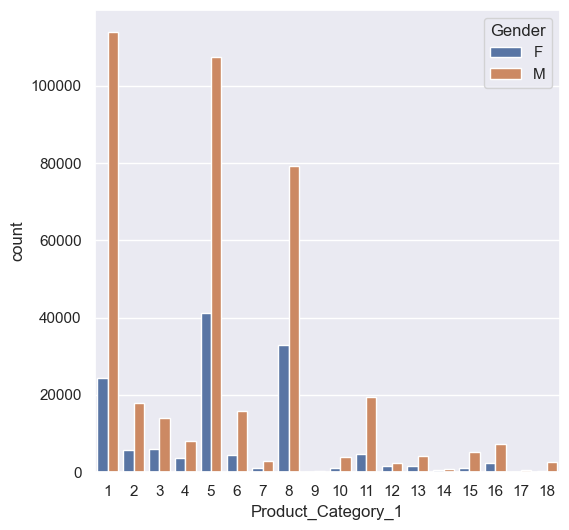

In [57]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

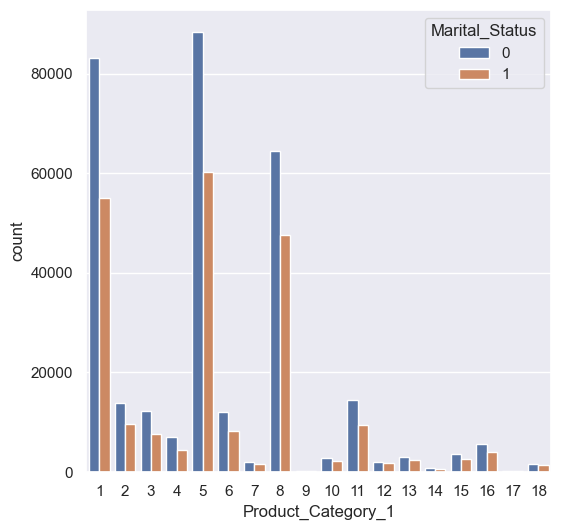

In [58]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=df)

Combining Gender and Marital status and analysing by creating one column in the Dataset.

In [60]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))

df['Marital_Gender']=l


In [63]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

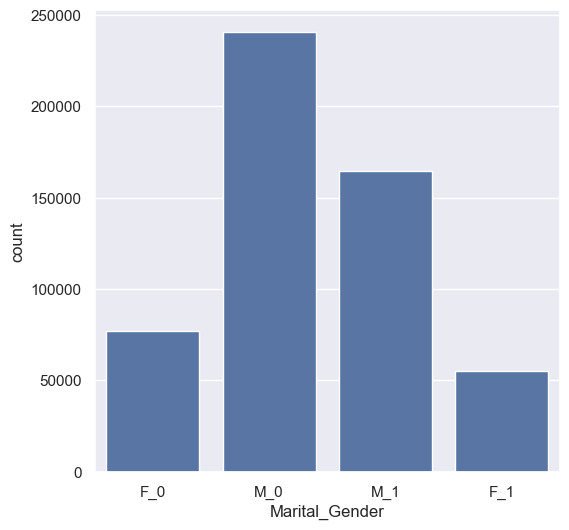

In [61]:
sns.countplot(x=df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

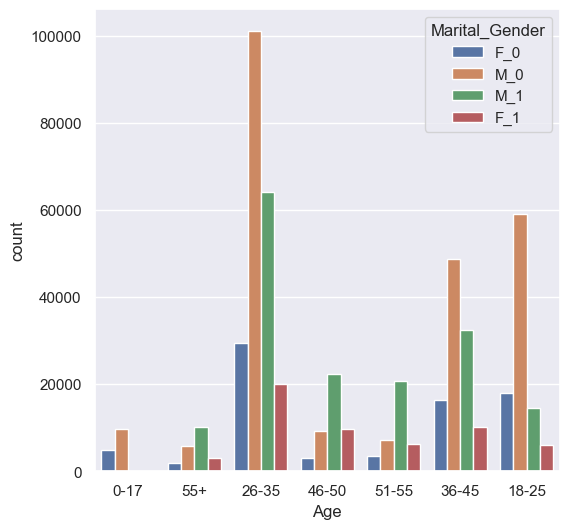

In [62]:
sns.countplot( x=df['Age'] , hue = df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

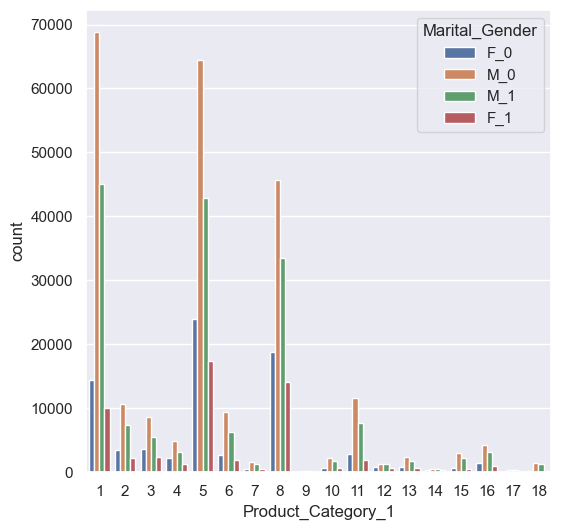

In [64]:
sns.countplot( x=df['Product_Category_1'] , hue = df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

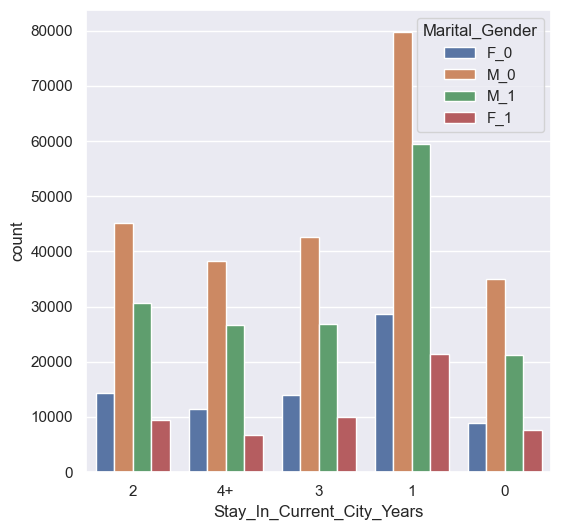

In [66]:
sns.countplot( x=df['Stay_In_Current_City_Years'] , hue = df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

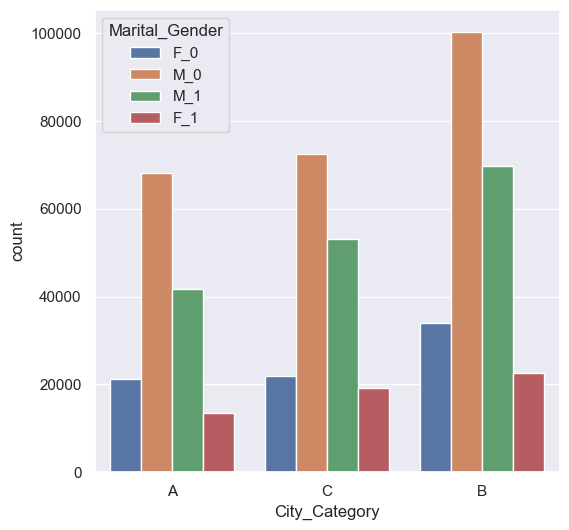

In [67]:
sns.countplot( x=df['City_Category'] , hue = df['Marital_Gender'])

Visual Insights

Total Purchases by Age Group

1. Younger and older age groups show distinct purchasing trends.
2. Age group '26-35' might show higher spending due to prime earning years.

Purchases by Gender

1. A bar plot indicates the count and amount of purchases by gender.
2. Gender-based marketing strategies can be derived from spending patterns.

City Category Distribution

1. Urban areas (Category A) might show higher spending than rural (Category C).
2. Insights can aid in region-specific marketing.

Stay Duration in City

1. Customer loyalty inferred from longer stays correlates with purchase amounts.
2. Strategies to enhance customer retention can be developed.

Recommendations

Targeted Marketing

1. Age-Specific Campaigns: Focus on high-spending age groups.
2. Gender-Based Offers: Tailor promotions based on gender spending habits.

Regional Strategies

1. Invest more in marketing for city categories showing higher purchase volumes.
2. Develop loyalty programs for long-term residents to boost retention.

Product Focus

1. Address missing data in secondary and tertiary product categories to understand complete buying behavior.
2. Promote popular product categories identified in the analysis.


Conclusion

The dataset offers valuable insights into customer demographics, spending behavior, and product preferences. By leveraging this data, the retail store can enhance its marketing strategies, improve customer retention, and increase overall sales.